# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [169]:
import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [170]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [171]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [172]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [173]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

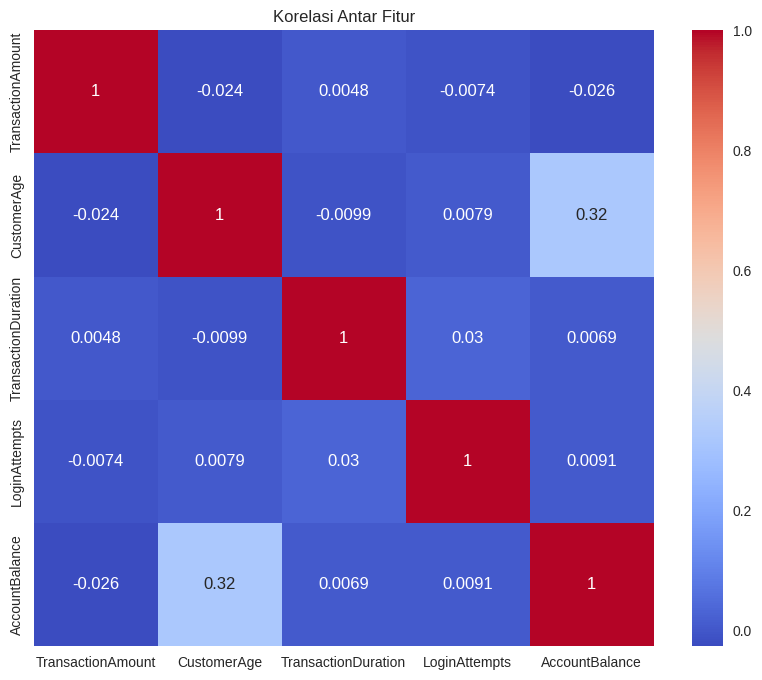

In [174]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10, 8))
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

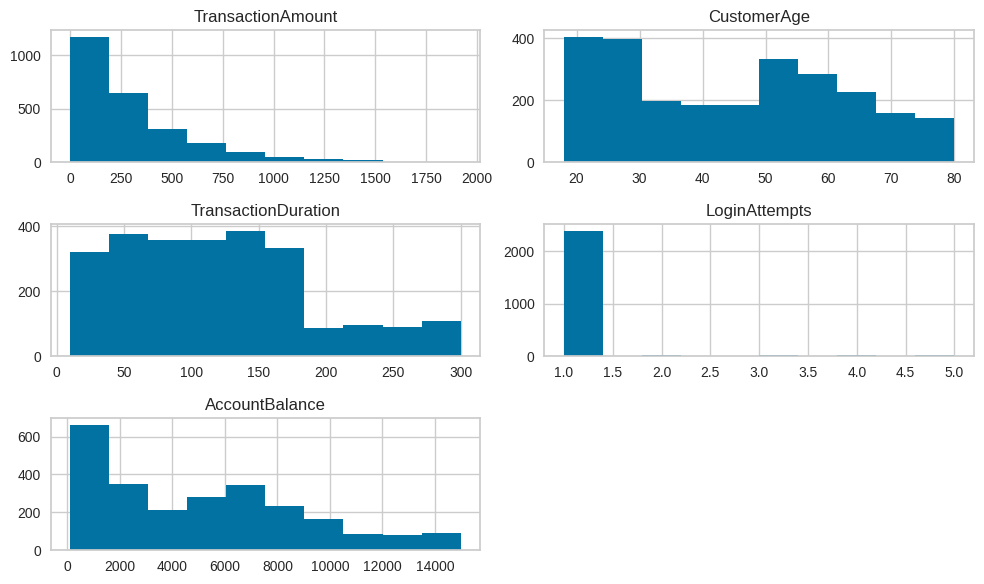

In [175]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numerical_cols.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

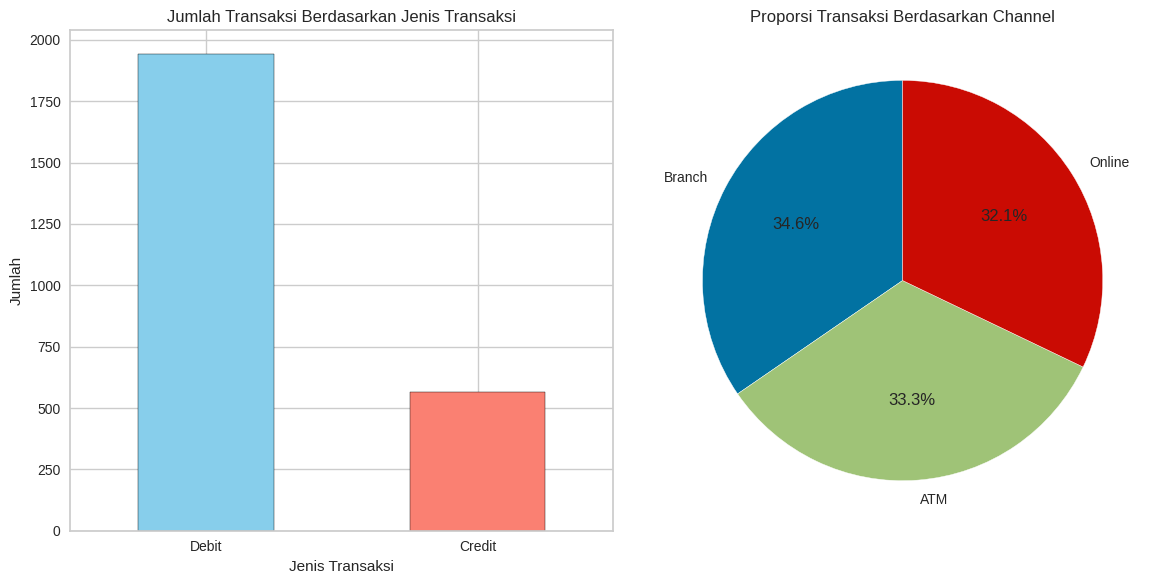

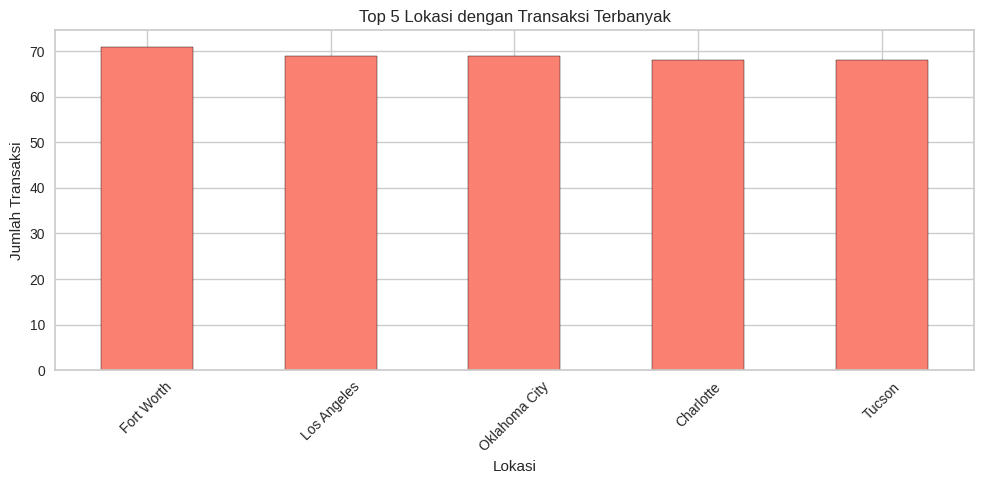

In [176]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
df['TransactionType'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'salmon'],
    edgecolor='black'
)
plt.title('Jumlah Transaksi Berdasarkan Jenis Transaksi')
plt.xlabel('Jenis Transaksi')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['Channel'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor':'white'}
)
plt.title('Proporsi Transaksi Berdasarkan Channel')
plt.ylabel('')

plt.tight_layout()
plt.show()

top_locations = df['Location'].value_counts().head(5)

plt.figure(figsize=(10,5))
top_locations.plot(
    kind='bar',
    color='salmon',
    edgecolor='black'
)

plt.title(f'Top 5 Lokasi dengan Transaksi Terbanyak')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [177]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [178]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [179]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
df = df.dropna(subset=['TransactionType'])

numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                  'LoginAttempts', 'AccountBalance']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

scalar = MinMaxScaler()
df[numerical_cols] = scalar.fit_transform(df[numerical_cols])

# Pastikan kamu menggunakan function head setelah melalukan scaling.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,0.435484,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [180]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'])

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,0.435484,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [181]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# Pastikan kamu menggunakan function head setelah melalukan encoding.
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,671,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1164,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1247,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,808,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1914,0,1,2,0.435484,3,0.648276,0.0,0.492591,16


In [182]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [183]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna(subset=['TransactionType'])

numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                  'LoginAttempts', 'AccountBalance']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

categorical_cols = ['Location', 'Channel', 'CustomerOccupation']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

df['TransactionDate'] = df['TransactionDate'].fillna(method='ffill')
df['PreviousTransactionDate'] = df['PreviousTransactionDate'].fillna('First_Transaction')

df.isnull().sum()

/tmp/ipython-input-931113046.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TransactionDate'] = df['TransactionDate'].fillna(method='ffill')


,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [184]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)

df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

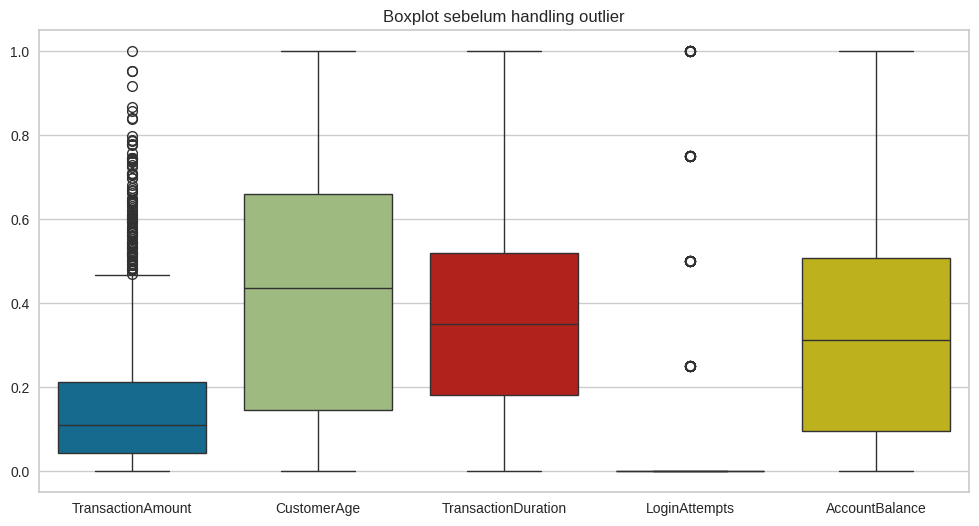

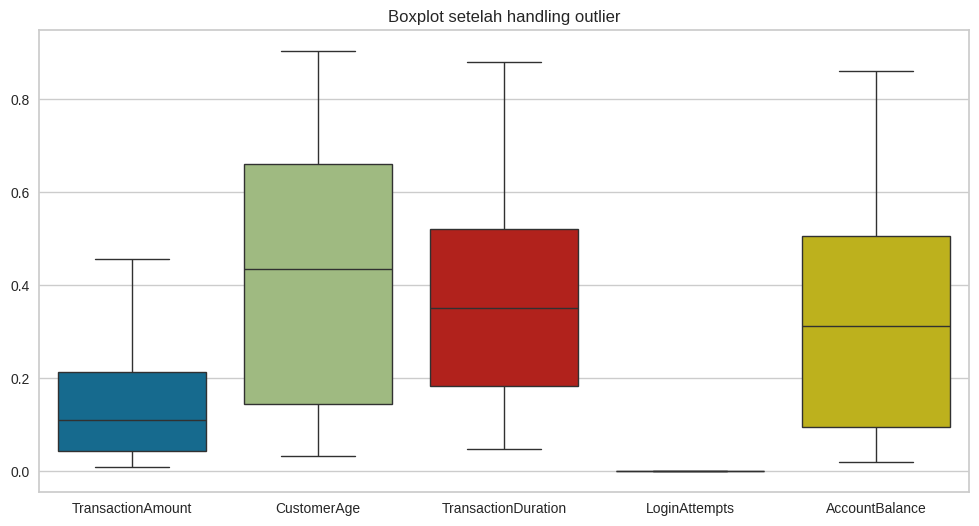

In [185]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot sebelum handling outlier")
plt.show()

for col in numerical_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot setelah handling outlier")
plt.show()

In [186]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

df['TransactionAmount_bin'] = pd.cut(
    df['TransactionAmount'],
    bins=4,
    labels=['Low', 'Medium', 'High', 'Very High'])

df['CustomerAge_bin'] = pd.cut(
    df['CustomerAge'],
    bins=3,
    labels=['Young', 'Adult', 'Senior'])

bin_encoders = {}
for col in ['TransactionAmount_bin', 'CustomerAge_bin']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    bin_encoders[col] = le

df[['TransactionAmount', 'TransactionAmount_bin', 'CustomerAge', 'CustomerAge_bin']].head()

,TransactionAmount,TransactionAmount_bin,CustomerAge,CustomerAge_bin
0,0.008474,1,0.838710,1
1,0.195940,2,0.806452,1
2,0.065680,1,0.032258,2
3,0.096016,1,0.129032,2
4,0.008474,1,0.435484,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [187]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_bin,CustomerAge_bin
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.0,2484.000000,2484.000000,2484.000000,2484.000000
mean,0.147525,1241.326892,0.773349,21.347424,1.011675,0.428153,1.533816,0.375540,0.0,0.334238,180.639291,1.360306,1.136473
std,0.128830,716.918261,0.418749,12.407615,0.830515,0.279973,1.149718,0.231783,0.0,0.252422,103.999730,0.813332,0.822738
min,0.008474,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.048276,0.0,0.020053,0.000000,0.000000,0.000000
25%,0.043084,620.750000,1.000000,11.000000,0.000000,0.145161,1.000000,0.182759,0.0,0.095325,91.000000,1.000000,0.000000
50%,0.110014,1241.500000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.0,0.311510,181.000000,1.000000,1.000000
75%,0.213754,1862.250000,1.000000,32.000000,2.000000,0.661290,3.000000,0.520690,0.0,0.507024,272.000000,2.000000,2.000000
max,0.457331,2455.000000,1.000000,43.000000,3.000000,0.903226,4.000000,0.879310,0.0,0.860055,360.000000,3.000000,2.000000


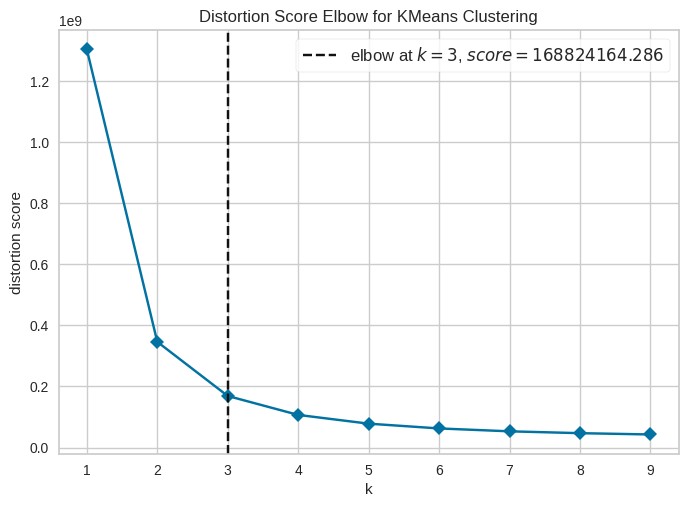

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [188]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,10), metric='distortion', timings=False)

visualizer.fit(df[numerical_cols])
visualizer.show()

In [189]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df[numerical_cols])

df['Cluster'] = kmeans.labels_

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_bin,CustomerAge_bin,Cluster
0,0.008474,671,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,1,1,1
1,0.195940,1164,1,15,0,0.806452,0,0.451724,0.0,0.860055,192,2,1,2
2,0.065680,1247,1,23,2,0.032258,3,0.158621,0.0,0.068637,41,1,2,2
3,0.096016,808,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,1,2,1
4,0.008474,1914,0,1,2,0.435484,3,0.648276,0.0,0.492591,16,1,0,0


Jalankan cell code ini untuk menyimpan model kamu.

In [190]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [191]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_score = silhouette_score(df[numerical_cols], df['Cluster'])
display(f"Silhouette Score: {silhouette_score}")

'Silhouette Score: 0.53971426379415'

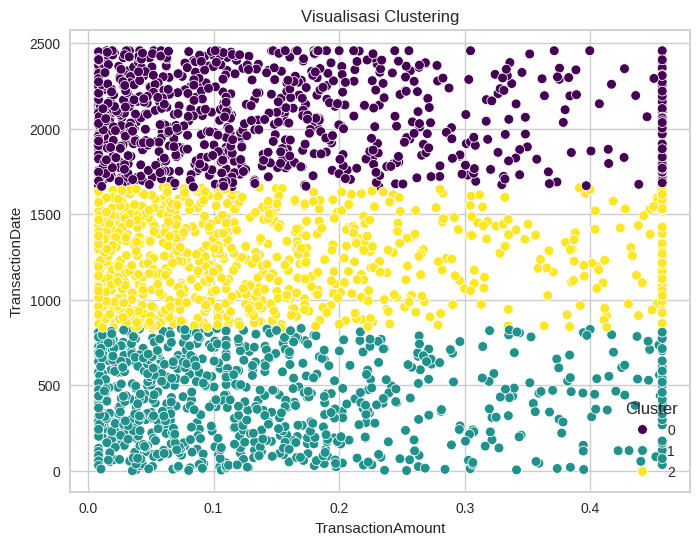

In [192]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x=numerical_cols[0],
    y=numerical_cols[1],
    hue='Cluster',
    palette='viridis',
    s=50
)
plt.title(f"Visualisasi Clustering")
plt.xlabel(numerical_cols[0])
plt.ylabel(numerical_cols[1])
plt.legend(title="Cluster")
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [193]:
# Membangun model menggunakan PCA.
pca = PCA(n_components= 2)
pca_result = pca.fit_transform(df[numerical_cols])
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(pca_df)

KMeans(n_clusters=3)

In [194]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [195]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
numerical_summary = df.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max'])

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

display(numerical_summary)

TransactionAmount                     TransactionDate              \
                     mean       min       max            mean   min   max   
Cluster                                                                     
0                0.148490  0.008474  0.457331     2070.478788  1659  2455   
1                0.143674  0.008474  0.457331      416.000000     0   832   
2                0.150445  0.008474  0.457331     1245.500000   833  1658   

        TransactionType           Location           Channel          \
                   mean min max       mean min max      mean min max   
Cluster                                                                
0              0.760000   0   1  21.473939   0  43  1.059394   0   3   
1              0.787515   0   1  21.021609   0  43  0.974790   0   3   
2              0.772397   0   1  21.549637   0  43  1.001211   0   3   

        CustomerAge                     CustomerOccupation          \
               mean       min       max               mean min max   
Cluster                                                              
0          0.425806  0.032258  0.903226           1.524848   0   4   
1          0.413178  0.032258  0.903226           1.515006   0   4   
2          0.445599  0.032258  0.903226           1.561743   0   4   

        TransactionDuration                    LoginAttempts            \
                       mean       min      max          mean  min  max   
Cluster                                                                  
0                  0.380247  0.048276  0.87931           0.0  0.0  0.0   
1                  0.367235  0.048276  0.87931           0.0  0.0  0.0   
2                  0.379214  0.048276  0.87931           0.0  0.0  0.0   

        AccountBalance                     PreviousTransactionDate           \
                  mean       min       max                    mean min  max   
Cluster                                                                       
0             0.341512  0.020053  0.860055              180.288485   0  360   
1             0.331198  0.020053  0.860055              184.529412   0  360   
2             0.330040  0.020053  0.860055              177.066586   0  360   

        TransactionAmount_bin         CustomerAge_bin          
                         mean min max            mean min max  
Cluster                                                        
0                    1.332121   0   3        1.105455   0   2  
1                    1.355342   0   3        1.176471   0   2  
2                    1.393462   0   3        1.127119   0   2

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah dengan Jumlah Transaksi Sedang dan Durasi Transaksi Tinggi)**:
  - **Rata-rata (mean) Transaction Amount:** 0.148 <Setelah inverse>
  - **Rata-rata (mean) Transaction Duration:** 0.380 <Setelah inverse>
  - **Analisis:** Cluster ini mencakup rata-rata pelanggan dengan jumlah transaksi yang sedang dan tingkat durasi transaksi yang tinggi. Hal ini menunjukkan bahwa nasabah meskipun memiliki frekuensi transaksi yang tidak terlalu tinggi, tetapi ternyata cenderung melakukan transaksi yang membutuhkan waktu lama.
2. **Cluster 1: (Nasabah dengan Jumlah Transaksi Rendah dan Durasi Transaksi Rendah)**:
  - **Rata-rata (mean) Transaction Amount:** 0.143 <Setelah inverse>
  - **Rata-rata (mean) Transaction Duration:** 0.367 <Setelah inverse>
  - **Analisis:** Cluster ini rata-rata memperlihatkan nasabah dengan jumlah transaksi yang paling rendah dan juga durasi transaksi yang rendah jika dibandingkan yang lain. Pada cluster ini memiliki kecenderungan lebih jarang melakukan transaksi serta serta transaksi yang dilakukan juga tidak memerlukan banyak waktu, yang dimana nasabah yang mungkin baru atau lebih pasif dalam bertransaksi.
3. **Cluster 2: (Nasabah dengan Jumlah Transaksi Tinggi dan Durasi Transaksi Sedang)**:
  - **Rata-rata (mean) Transaction Amount:** 0.150 <Setelah inverse>
  - **Rata-rata (mean) Transaction Duration:** 0.379 <Setelah inverse>
  - **Analisis:** Cluster ini berisi nasabah dengan rata-rata jumlah transaksi tertinggi dan memiliki durasi transaksi yang tidak terlalu tinggi maupun rendah. Nasabah pada cluster ini termasuk tipe yang aktif dan efisien dalam bertransaksi, mereka cenderung melakukan transaksi dengan frekuensi tinggi tapi tetap mengutamakan kecepatan atau kemudahan transaksi.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [196]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': 'Target'})

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_bin,CustomerAge_bin,Target
0,0.008474,671,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,1,1,1
1,0.195940,1164,1,15,0,0.806452,0,0.451724,0.0,0.860055,192,2,1,2
2,0.065680,1247,1,23,2,0.032258,3,0.158621,0.0,0.068637,41,1,2,2
3,0.096016,808,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,1,2,1
4,0.008474,1914,0,1,2,0.435484,3,0.648276,0.0,0.492591,16,1,0,0


In [197]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [198]:
# inverse dataset ke rentang normal untuk numerikal
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
df[numerical_cols] = scalar.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_bin,CustomerAge_bin,Target
0,16.52,671,1,36,0,70.0,0,81.0,1.0,5112.21,105,1,1,1
1,376.24,1164,1,15,0,68.0,0,141.0,1.0,12896.06,192,2,1,2
2,126.29,1247,1,23,2,20.0,3,56.0,1.0,1122.35,41,1,2,2
3,184.50,808,1,33,2,26.0,3,25.0,1.0,8569.06,163,1,2,1
4,16.52,1914,0,1,2,45.0,3,198.0,1.0,7429.40,16,1,0,0


In [199]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
categorical_cols = ['TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']
bin_cols = ['TransactionAmount_bin', 'CustomerAge_bin']

for col in categorical_cols:
    le = encoders[col]
    df[col] = le.inverse_transform(df[col].astype(int))

for col in bin_cols:
    df[col] = bin_encoders[col].inverse_transform(df[col].astype(int))

# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_bin,CustomerAge_bin,Target
0,16.52,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Low,Senior,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,12896.06,2024-11-04 08:09:35,Medium,Senior,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,20.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Low,Young,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Low,Young,1
4,16.52,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,Low,Adult,0


In [200]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols= df.select_dtypes(include=['object']).columns

numerical_summary = df.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max'])
categortical_summary = df.groupby('Target')[categorical_cols].agg(lambda x: x.mode()[0])

display(numerical_summary)
display(categortical_summary)

TransactionAmount                CustomerAge              \
                    mean    min     max        mean   min   max   
Target                                                            
0             285.189927  16.52  877.81   44.400000  20.0  74.0   
1             275.949712  16.52  877.81   43.617047  20.0  74.0   
2             288.941852  16.52  877.81   45.627119  20.0  74.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0               120.271515  24.0  265.0           1.0  1.0  1.0   
1               116.498199  24.0  265.0           1.0  1.0  1.0   
2               119.972155  24.0  265.0           1.0  1.0  1.0   

       AccountBalance                    
                 mean     min       max  
Target                                   
0         5181.829818  399.57  12896.06  
1         5028.401693  399.57  12896.06  
2         5011.162482  399.57  12896.06

,TransactionDate,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate,TransactionAmount_bin,CustomerAge_bin
Target,,,,,,,,
0,Unknown,Debit,Colorado Springs,Branch,Student,Unknown,Low,Young
1,2023-01-02 16:00:06,Debit,Miami,Branch,Student,2024-11-04 08:10:23,Low,Young
2,2023-05-09 16:55:54,Debit,Memphis,Branch,Retired,Unknown,Low,Young


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah dengan Jumlah Transaksi Sedang dan Durasi Transaksi Tinggi)**:
  - **Rata-rata (mean) Transaction Amount:** 285.19
  - **Rata-rata (mean) Transaction Duration:** 120.27 detik
  - **Analisis:** Pada cluster ini nasabanya melakukan transaksi dalam jumlah sedang namun memiliki durasi yang relatif tinggi untuk setiap transaksinya. Mengindikasikan bahwa mungkin mereka melakukan transaksi yang lebih kompleks atau butuh waktu lama untuk setiap transaksi, meski frekuensi yang rendah. Sehingga kemungkinan berisi nasabah yang mengutamakan ketelitian atau transaksi bernilai tinggi atau malah bisa menjadi indikasi penipuan dengan mempertimbangkan informasi fitur yang lain.
2. **Cluster 1: (Nasabah dengan Jumlah Transaksi Rendah dan Durasi Transaksi Rendah)**:
  - **Rata-rata (mean) Transaction Amount:** 275.95
  - **Rata-rata (mean) Transaction Duration:** 116.50 detik
  - **Analisis:** Pada cluster ini memiliki nasabah dengan jumlah transaksi yang rendah sekaligus durasi transaksi yang relatif singkat. Ini mengindikasikan nasabah cenderung melakukan aktivitas transaksi yang terbatas dan cepat, yang bisa jadi nasabah baru atau pengguna layanan yang hanya melakukan transaksi dasar dengan durasi yang singkat.
3. **Cluster 2: (Nasabah dengan Jumlah Transaksi Tinggi dan Durasi Transaksi Sedang)**:
  - **Rata-rata (mean) Transaction Amount:** 288.94
  - **Rata-rata (mean) Transaction Duration:** 119.97  detik
  - **Analisis:** Cluster ini berisi nasabah dengan rata-rata jumlah transaksi tertinggi dan memiliki durasi transaksi yang tidak terlalu tinggi maupun rendah. Nasabah pada cluster ini termasuk tipe yang aktif dan efisien dalam bertransaksi, mereka cenderung melakukan transaksi dengan frekuensi tinggi tapi tetap mengutamakan kecepatan atau kemudahan transaksi. Pada cluster ini nasabah memiliki rata-rata jumlah transaksi tertinggi dengan durasi transaksi sedang. Nasabah pada cluster ini menunjukkan bahwa mereka adalah nasabah yang sangat aktif, tetapi mereka melakukan transaksi dengan efisien, tidak memerlukan waktu terlalu lama untuk transaksi yang dilakukan.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [201]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse = df.copy()

# Lihat hasil akhirnya
df_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_bin,CustomerAge_bin,Target
0,16.52,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Low,Senior,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,12896.06,2024-11-04 08:09:35,Medium,Senior,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,20.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Low,Young,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Low,Young,1
4,16.52,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,Low,Adult,0


In [202]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False, na_rep='')

End of Code.